In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [3]:
# Téléchargement des ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
text = """Customs Duties: A Highly Risky Standoff Between Donald Trump and the Financial Markets
The US president's tariff offensive led to another catastrophic stock market session in Asia and Europe on Monday. While the risk of a crash appears to have been averted for the time being, confidence in the United States, the world's leading economic power, is beginning to be undermined.
A game of chicken... In English, the "game of chicken" consists of two drivers driving into each other, the winner being the one who, impassive, stays the course. The stock market plunge since Thursday, April 3, is similar: on one side, plummeting prices; on the other, an American president who refuses to listen. A very high-risk standoff is taking place between the two, as Monday, April 7, demonstrated once again. After another disastrous stock market session in Asia and Europe, Wall Street had just opened relatively calmly, with indices even beginning to recover slightly. With an angry message on his network, Truth Social, Donald Trump once again sowed panic. "If China does not withdraw its 34% tariff increase [announced by Beijing on Friday as a retaliatory measure] (...) by tomorrow, April 8, 2025, the United States will impose ADDITIONAL tariffs of 50%, effective April 9."""""

In [5]:
# Tokenisation en phrases
sentences = sent_tokenize(text, language='english')
print("=== Phrases tokenisées ===")
for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")


=== Phrases tokenisées ===
1. Customs Duties: A Highly Risky Standoff Between Donald Trump and the Financial Markets
The US president's tariff offensive led to another catastrophic stock market session in Asia and Europe on Monday.
2. While the risk of a crash appears to have been averted for the time being, confidence in the United States, the world's leading economic power, is beginning to be undermined.
3. A game of chicken...
4. In English, the "game of chicken" consists of two drivers driving into each other, the winner being the one who, impassive, stays the course.
5. The stock market plunge since Thursday, April 3, is similar: on one side, plummeting prices; on the other, an American president who refuses to listen.
6. A very high-risk standoff is taking place between the two, as Monday, April 7, demonstrated once again.
7. After another disastrous stock market session in Asia and Europe, Wall Street had just opened relatively calmly, with indices even beginning to recover slig

In [6]:
# Tokenisation en mots
words = word_tokenize(text)
print("\n=== Mots tokenisés ===")
print("Nombre total de mots:", len(words))
print("\nAperçu des 10 premiers mots:")
for i, word in enumerate(words[:10], 1):
    print(f"{i}. {word}")


=== Mots tokenisés ===
Nombre total de mots: 251

Aperçu des 10 premiers mots:
1. Customs
2. Duties
3. :
4. A
5. Highly
6. Risky
7. Standoff
8. Between
9. Donald
10. Trump


In [7]:
# Fréquence des mots et visualisation
fdist = FreqDist(words)

print("\n=== 20 mots les plus fréquents ===")
most_common = fdist.most_common(20)
for word, freq in most_common:
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents ===
',' : 22 occurrences
'the' : 12 occurrences
'.' : 8 occurrences
'to' : 5 occurrences
'on' : 5 occurrences
'of' : 5 occurrences
'April' : 4 occurrences
'A' : 3 occurrences
'and' : 3 occurrences
'stock' : 3 occurrences
'market' : 3 occurrences
'in' : 3 occurrences
'is' : 3 occurrences
':' : 2 occurrences
'Donald' : 2 occurrences
'Trump' : 2 occurrences
'The' : 2 occurrences
'president' : 2 occurrences
''s' : 2 occurrences
'tariff' : 2 occurrences


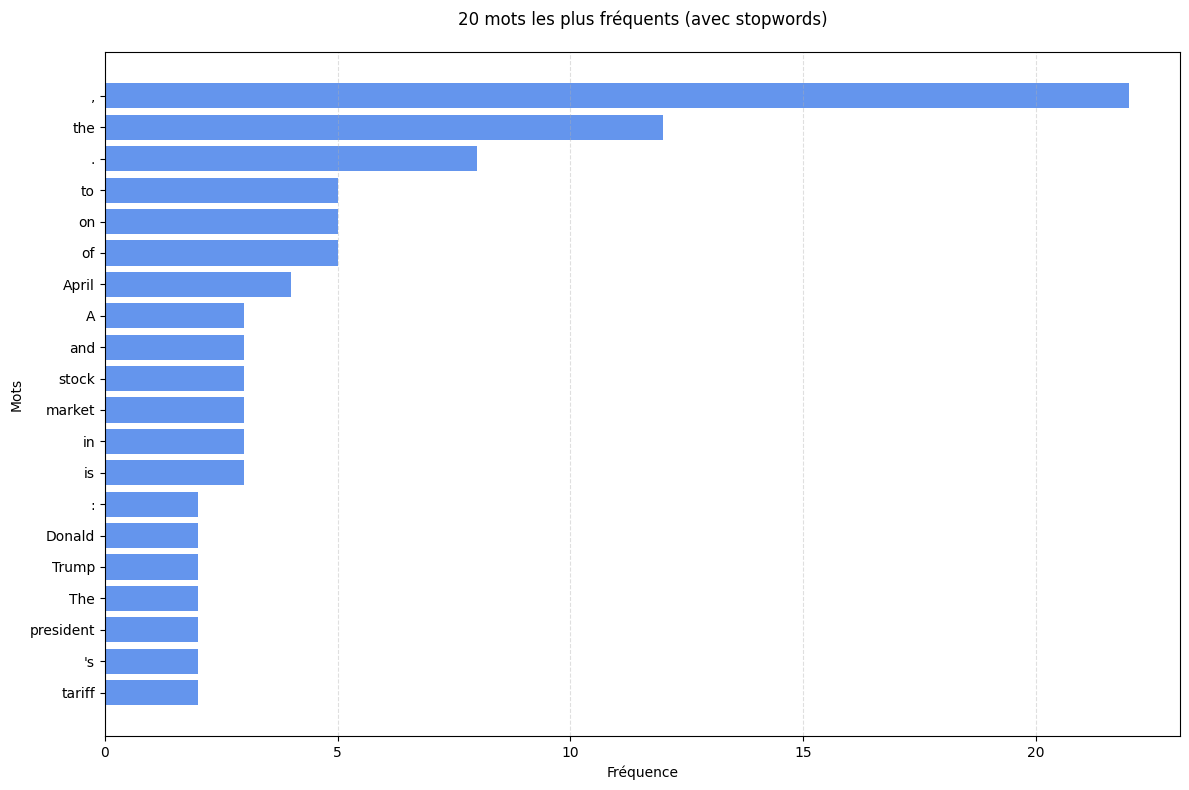

In [8]:
# Obtenir les 20 mots les plus fréquents avec leurs fréquences
most_common = fdist.most_common(20)
words_freq = list(zip(*most_common))

plt.figure(figsize=(12, 8))
plt.barh(words_freq[0], words_freq[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (avec stopwords)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Ajustement de la mise en page
plt.tight_layout()

# Inverser l'axe y pour avoir le mot le plus fréquent en haut
plt.gca().invert_yaxis()

plt.show()

In [9]:
# Nettoyage: suppression des stopwords et ponctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

filtered_words = [
    word.lower() for word in words 
    if word.lower() not in stop_words 
    and word not in punctuation 
    and not word.isdigit()
]

# Fréquence des mots nettoyés
fdist_filtered = FreqDist(filtered_words)

print("\n=== 20 mots les plus fréquents après nettoyage ===")
for word, freq in fdist_filtered.most_common(20):
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents après nettoyage ===
'april' : 4 occurrences
'stock' : 3 occurrences
'market' : 3 occurrences
'standoff' : 2 occurrences
'donald' : 2 occurrences
'trump' : 2 occurrences
'president' : 2 occurrences
''s' : 2 occurrences
'tariff' : 2 occurrences
'another' : 2 occurrences
'session' : 2 occurrences
'asia' : 2 occurrences
'europe' : 2 occurrences
'monday' : 2 occurrences
'united' : 2 occurrences
'states' : 2 occurrences
'beginning' : 2 occurrences
'game' : 2 occurrences
'chicken' : 2 occurrences
'...' : 2 occurrences


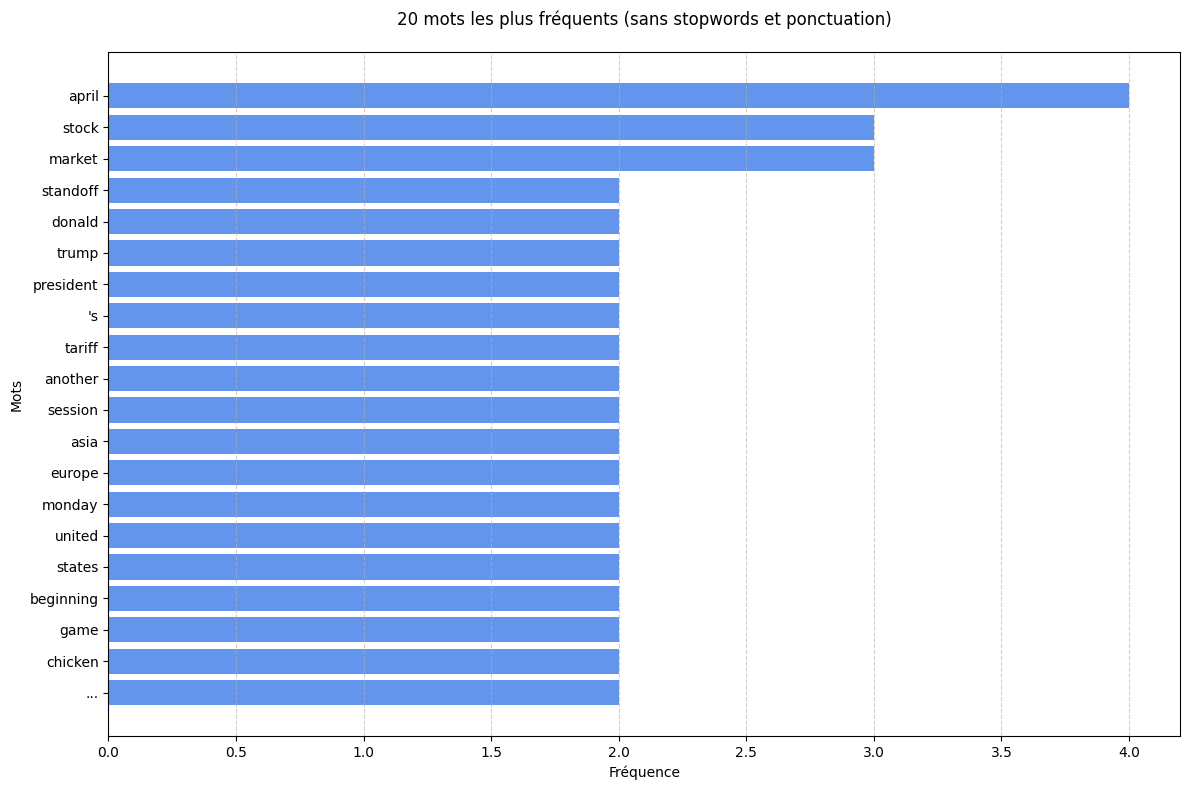

In [10]:
# Obtenir les 20 mots les plus fréquents
most_common = fdist_filtered.most_common(20)
words_freq = list(zip(*most_common))

plt.figure(figsize=(12, 8))
plt.barh(words_freq[0], words_freq[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (sans stopwords et ponctuation)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustement de la mise en page
plt.tight_layout()

# Inverser l'axe y pour avoir le mot le plus fréquent en haut
plt.gca().invert_yaxis()

plt.show()

# Stemming & Lemmatizing (Partie 2)

In [11]:
# Création du stemmer
stemmer = PorterStemmer()

# Application du stemmer sur les mots filtrés
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Calcul des fréquences avec FreqDist
fdist_stemmed = FreqDist(stemmed_words)

print("=== 20 mots les plus fréquents après stemming ===")
for word, freq in fdist_stemmed.most_common(20):
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents après stemming ===
'market' : 4 occurrences
'april' : 4 occurrences
'tariff' : 3 occurrences
'stock' : 3 occurrences
'standoff' : 2 occurrences
'donald' : 2 occurrences
'trump' : 2 occurrences
'presid' : 2 occurrences
''s' : 2 occurrences
'anoth' : 2 occurrences
'session' : 2 occurrences
'asia' : 2 occurrences
'europ' : 2 occurrences
'monday' : 2 occurrences
'unit' : 2 occurrences
'state' : 2 occurrences
'begin' : 2 occurrences
'game' : 2 occurrences
'chicken' : 2 occurrences
'...' : 2 occurrences


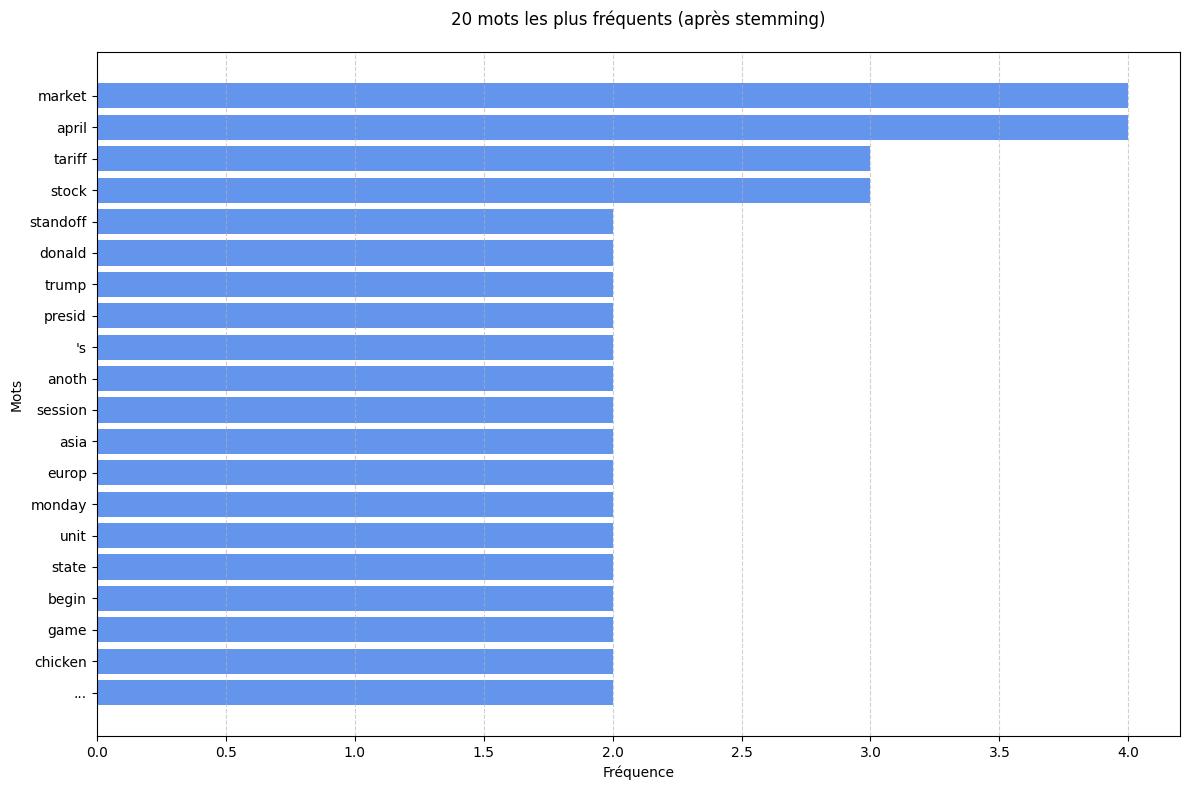

In [12]:
# Visualisation
most_common_stemmed = fdist_stemmed.most_common(20)
words_freq_stemmed = list(zip(*most_common_stemmed))

plt.figure(figsize=(12, 8))
plt.barh(words_freq_stemmed[0], words_freq_stemmed[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (après stemming)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [13]:
# Création du lemmatizer
lemmatizer = WordNetLemmatizer()

# Application du lemmatizer sur les mots filtrés
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Calcul des fréquences avec FreqDist
fdist_lemmatized = FreqDist(lemmatized_words)

print("=== 20 mots les plus fréquents après lemmatization ===")
for word, freq in fdist_lemmatized.most_common(20):
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents après lemmatization ===
'market' : 4 occurrences
'april' : 4 occurrences
'tariff' : 3 occurrences
'stock' : 3 occurrences
'standoff' : 2 occurrences
'donald' : 2 occurrences
'trump' : 2 occurrences
'president' : 2 occurrences
''s' : 2 occurrences
'another' : 2 occurrences
'session' : 2 occurrences
'asia' : 2 occurrences
'europe' : 2 occurrences
'monday' : 2 occurrences
'united' : 2 occurrences
'state' : 2 occurrences
'beginning' : 2 occurrences
'game' : 2 occurrences
'chicken' : 2 occurrences
'...' : 2 occurrences


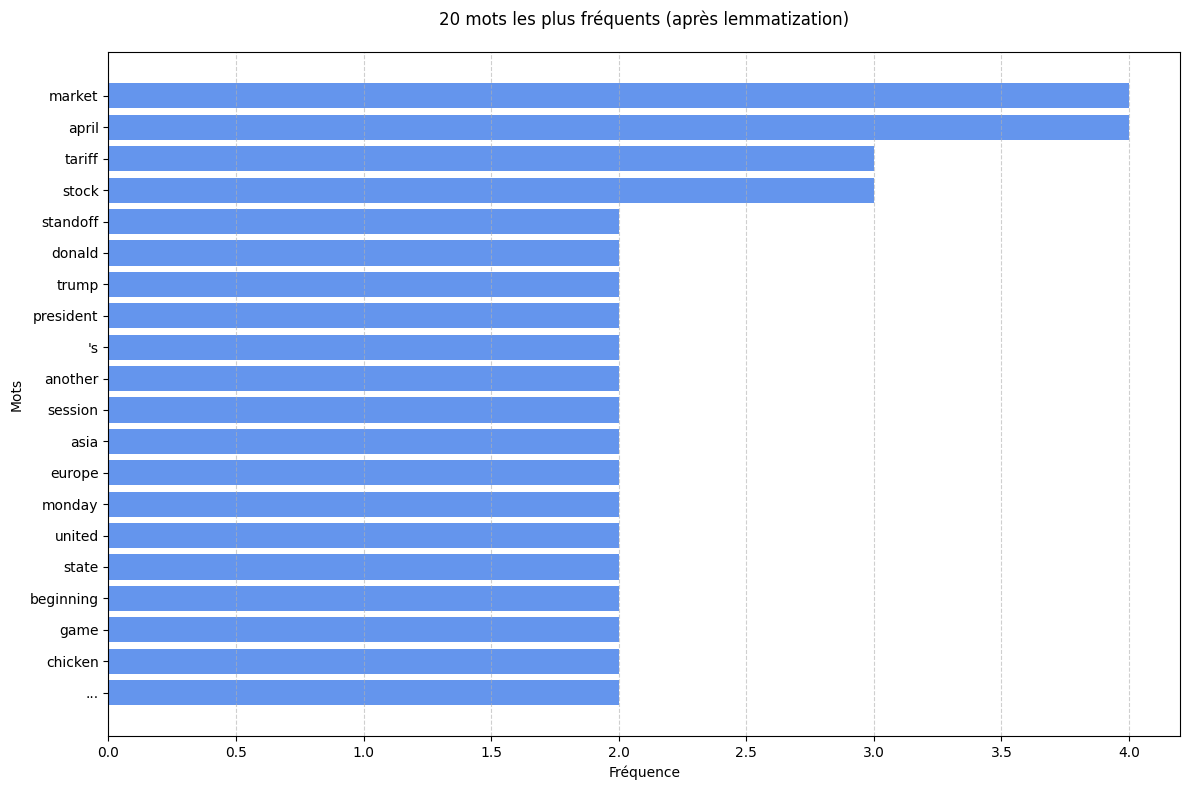

In [14]:
# Visualisation
most_common_lemmatized = fdist_lemmatized.most_common(20)
words_freq_lemmatized = list(zip(*most_common_lemmatized))

plt.figure(figsize=(12, 8))
plt.barh(words_freq_lemmatized[0], words_freq_lemmatized[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (après lemmatization)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Comparaison des résultats
print("=== Différences entre Stemming et Lemmatization ===")
print("\nMots modifiés par le stemming :")
stemming_changes = [(word, stemmer.stem(word)) for word in set(filtered_words) 
                   if stemmer.stem(word) != word]
for original, stemmed in stemming_changes:
    print(f"{original} -> {stemmed}")


=== Différences entre Stemming et Lemmatization ===

Mots modifiés par le stemming :
duties -> duti
calmly -> calmli
appears -> appear
drivers -> driver
message -> messag
refuses -> refus
additional -> addit
slightly -> slightli
impose -> impos
prices -> price
demonstrated -> demonstr
sowed -> sow
relatively -> rel
since -> sinc
plummeting -> plummet
another -> anoth
averted -> avert
undermined -> undermin
risky -> riski
beginning -> begin
united -> unit
indices -> indic
economic -> econom
consists -> consist
announced -> announc
disastrous -> disastr
stays -> stay
measure -> measur
plunge -> plung
states -> state
recover -> recov
catastrophic -> catastroph
tariffs -> tariff
europe -> europ
increase -> increas
taking -> take
markets -> market
course -> cours
confidence -> confid
opened -> open
customs -> custom
angry -> angri
retaliatory -> retaliatori
leading -> lead
highly -> highli
offensive -> offens
financial -> financi
impassive -> impass
driving -> drive
beijing -> beij
presiden

In [16]:
print("\nMots modifiés par la lemmatization :")
lemmatization_changes = [(word, lemmatizer.lemmatize(word)) for word in set(filtered_words) 
                        if lemmatizer.lemmatize(word) != word]
for original, lemmatized in lemmatization_changes:
    print(f"{original} -> {lemmatized}")


Mots modifiés par la lemmatization :
duties -> duty
drivers -> driver
refuses -> refuse
prices -> price
us -> u
indices -> index
stays -> stay
states -> state
tariffs -> tariff
markets -> market
customs -> custom


Comparaison des deux méthodes :

1. Le stemming a modifié plus de mots que la lemmatization :
- Le stemming a transformé 51 mots
- La lemmatization a transformé 11 mots

2. Différences principales observées :
- Le stemming est plus agressif et peut créer des "non-mots" (ex: "slightli", "highli", "financi")
- La lemmatization produit des formes de base existantes dans le dictionnaire (ex: "driver", "index", "duty")

3. Impact sur les fréquences :
- Les mots les plus fréquents restent globalement les mêmes dans les deux cas
- Quelques différences notables :
  * Stemming : "presid" au lieu de "president"
  * Stemming : "unit" au lieu de "united"
  * Stemming : "begin" au lieu de "beginning"

4. En termes d'efficacité d'agrégation :
- Le stemming a permis plus de regroupements mais avec parfois des formes moins naturelles
- La lemmatization a fourni moins de regroupements mais avec des formes plus standard et compréhensibles

Dans ce cas précis, la lemmatization semble plus appropriée car elle préserve mieux le sens des mots tout en permettant un regroupement efficace des variantes morphologiques.